# Homework 6 - Fish.csv

### Name: Shayari Peiris
### Collaborator: Vishwesh Srinivasan, Veer Kumar


DATA 201A 

Fall 2022

Tufts University

In [43]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
from sklearn.model_selection import KFold, train_test_split 

# Question 1
Read in 'Fish.csv' as a dataframe. (a) How many different species of fish does the dataset contain? Use the LebelEncoder to transform the species column. (b) Separate the dataframe into an $X$ and $y$ variable, for this data our response variable / predicted variable is going to be the column 'Weight'. (c) Split the $X$ and $y$ data into train and test sets (with test_size = 20), and run linear regression on the train set. (d) Report the MSE and r^2 metrics for the test set.

In [44]:
#Question 1
#Loading dataset

df = pd.read_csv('Fish.csv')
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [45]:
#Question 1 cont
#(a) How many different species of fish does the dataset contain?

df['Species'].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [46]:
#Question 1 cont
#Use the LebelEncoder to transform the species column.

#how can we make predictions for categorical data? we need to transform categorical data into numerical data
le = LabelEncoder()

#Step 1: fit a lebel class (unique values)
le.fit(df['Species']) #extracting unique values from list 'countries'
list(le.classes_) #showing unique values from list 'countries'

['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish']

In [47]:
#Question 1 cont
#Use the LebelEncoder to transform the species column.

df['Species'] = le.transform(df['Species'])
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,0,290.0,24.0,26.3,31.2,12.4800,4.3056
2,0,340.0,23.9,26.5,31.1,12.3778,4.6961
3,0,363.0,26.3,29.0,33.5,12.7300,4.4555
4,0,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,5,12.2,11.5,12.2,13.4,2.0904,1.3936
155,5,13.4,11.7,12.4,13.5,2.4300,1.2690
156,5,12.2,12.1,13.0,13.8,2.2770,1.2558
157,5,19.7,13.2,14.3,15.2,2.8728,2.0672


In [48]:
#Question 1 cont
#(b) Separate the dataframe into an x and y variable, 
#for this data our response variable / predicted variable is going to be the column 'Weight'.

X = df[['Species','Length1', 'Length2', 'Length3', 'Height', 'Width']]
Y = df['Weight']

In [49]:
#Question 1 cont
#(c) Split the  𝑋  and  𝑦  data into train and test sets (with test_size = .20)
# run linear regression on the train set.

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.20, random_state=42)
lm = LinearRegression() #importing Linear Regression and passing to lm object
lm.fit(X_train,Y_train)
test_predictions = lm.predict(X_test) #Predictions on Test Data
prediction = pd.DataFrame(Y_test) #Creating a new dataframe prediction using Y_test data
prediction['test_predictions'] = test_predictions #Adding new column test_predictions

#Showing the top 10 records to compare original target value with our predictions
#shows actual median value vs predicted median value
prediction.head(10)

,Weight,test_predictions
78,78.0,76.852435
155,13.4,-122.873152
128,200.0,383.344496
55,270.0,420.944718
94,150.0,149.914824
29,1000.0,828.547139
147,7.0,-192.515578
51,180.0,289.991264
98,188.0,248.953049
141,1250.0,1135.746471


In [50]:
#Question 1 cont
#(d) Report the MSE and r^2 metrics for the test set.

print('MSE:', round(metrics.mean_squared_error(Y_test, test_predictions), 2))
print('R2:', round(r2_score(Y_test, test_predictions), 2))

#model can fit 90% of training data = R2 = 90%

MSE: 13727.82
R2: 0.9


# Question 2
Write a function that will compute the MSE of a set of true variables and its corresponding predicted variables. THis function should take in two variables, a y_test set and a y_pred set, and it should return a single number. Test to see if your function gives the same output as the built in MSE function.

In [51]:
#Question 2
def my_MSE(y_test,y_pred):
        mse_value = round(sum((y_test - y_pred)**2)/len(y_test),2)
        return mse_value
my_MSE(Y_test,test_predictions)

13727.82

In [52]:
print('My function gives the same output as the built in MSE function')

My function gives the same output as the built in MSE function


# Question 3
Create a heatmap of the correlations between correlations of the $X$ data, comment on the values (are they relatively high, relatively low? Is that expected?)

In [53]:
#Question 3
#computing correlations between X data and storing correlations in df called "X_data_corr"

X_data_corr = df[['Length1', 'Length2', 'Length3', 'Height', 'Width','Species']].corr()
X_data_corr

,Length1,Length2,Length3,Height,Width,Species
Length1,1.000000,0.999517,0.992031,0.625378,0.867050,-0.266696
Length2,0.999517,1.000000,0.994103,0.640441,0.873547,-0.283601
Length3,0.992031,0.994103,1.000000,0.703409,0.878520,-0.335519
Height,0.625378,0.640441,0.703409,1.000000,0.792881,-0.698193
Width,0.867050,0.873547,0.878520,0.792881,1.000000,-0.397578
Species,-0.266696,-0.283601,-0.335519,-0.698193,-0.397578,1.000000


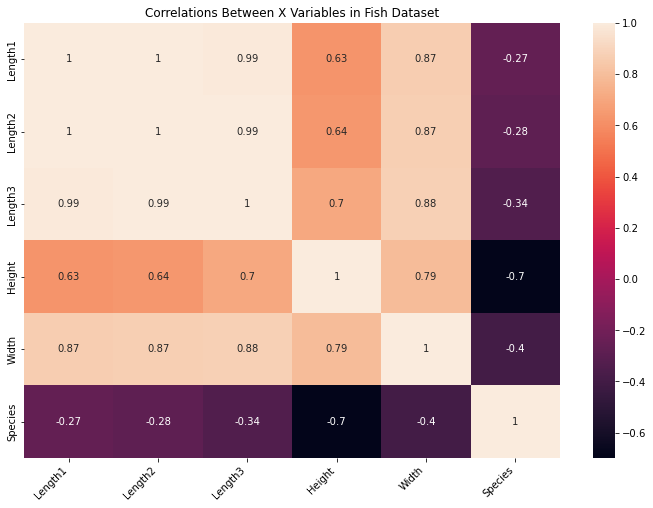

In [69]:
#Question 3 cont
#heatmap of the correlations between X data dataframe

plt.figure(figsize = (12,8))
corrplot = sns.heatmap((X_data_corr), annot=True)
corrplot.set_xticklabels(corrplot.get_xticklabels(), rotation = 45, horizontalalignment = 'right')
plt.title('Correlations Between X Variables in Fish Dataset')
plt.show()

Question 3 cont: comment on the values (are they relatively high, relatively low? Is that expected?)

The correlations between many of the x variables are **relatively high**. This is because height, length, and width are usually related to each other. However, correlations between species and other variables are low. 

# Question 4
We may not need every column in $X$ to get a good prediction, we are going to try do some 'feature selection'. (a) For each column in $X$, run a linear regression model on it (and only that column, and do not forget to split the data into a train and test set first) with the $y$ data, and keep track of the MSE. What column had the smallest MSE? (b) Now that you have a column that predicts the response variable the best on its own, lets find a second column that minimizes the MSE. So, repeat part (a) except for each left over column combine it with the best column so you have a pair of columns, then run a linear regression using that, again keeping track of the MSE in each case. What second column minimized the MSE? And is that MSE smaller than the one column case? (c) Time to generalize! In a new cell, write a function that takes in a test set $X$ and a reponse variable set $y$, and it will output what combination of features that minimize the MSE (according to our makeshift algorithm). The function should output a list with the column numbers, and also the MSE that was minimum. (d) This is not guaranteed to find the optimal combination of variables however, explain why. What is the benefit to finding an optimal combination in this way however?

In [55]:
#4a 
#For each column in  𝑋 , run a linear regression model on it 
#(and only that column, and do not forget to split the data into a train and test set first) with the  𝑦  data, 
#and keep track of the MSE. 


X_new = df[['Length1', 'Length2', 'Length3', 'Height', 'Width','Species']]
Y_new = df['Weight']

In [56]:
#4a cont
def OLSfunction(X):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.20, random_state=42)
    lm = LinearRegression() 
    lm.fit(X_train,Y_train)
    test_predictions = lm.predict(X_test) 
    print('MSE:', metrics.mean_squared_error(Y_test, test_predictions))
    
for column in X_new:
    print(column)
    OLSfunction(X_new[[column]])

Length1
MSE: 26796.684740821394
Length2
MSE: 25604.524458494772
Length3
MSE: 21835.271889248193
Height
MSE: 45896.947811413644
Width
MSE: 24143.054379169185
Species
MSE: 121470.29300110077


In [57]:
#4a cont
#What column had the smallest MSE? 

print('Length 3 has the smallest MSE')

Length 3 has the smallest MSE


In [58]:
#4b: Now that you have a column that predicts the response variable the best on its own, 
#lets find a second column that minimizes the MSE.

predictors1 = df[['Length3', 'Length1']]
print('Length3 and Length1')
OLSfunction(predictors1)

Length3 and Length1
MSE: 22499.997076686916


In [59]:
#4b cont
predictors2 = df[['Length3', 'Length2']]
print('Length3 and Length2')
OLSfunction(predictors2)

Length3 and Length2
MSE: 22756.848728304238


In [60]:
#4b cont
predictors3 = df[['Length3', 'Height']]
print('Length3 and Height')
OLSfunction(predictors3)

Length3 and Height
MSE: 18736.78034312703


In [61]:
#4b cont
predictors4 = df[['Length3', 'Width']]
print('Length3 and Width')
OLSfunction(predictors4)

Length3 and Width
MSE: 18400.73067165252


In [62]:
#4b cont
predictors5 = df[['Length3', 'Species']]
print('Length3 and Species')
OLSfunction(predictors5)

Length3 and Species
MSE: 21865.57546083863


In [63]:
#4b cont
#What second column minimized the MSE? And is that MSE smaller than the one column case? 

print('Width minimized MSE. The MSE of Width and Length 3 is smaller than the MSE of just Length 3')

Width minimized MSE. The MSE of Width and Length 3 is smaller than the MSE of just Length 3


In [64]:
# 4c

X = df[['Species','Length1', 'Length2', 'Length3', 'Height', 'Width']]
Y = df['Weight']

def forward_selection(X,Y):
    
    global master_index
    global master_mse
    
    # boundary condition - when master_index becomes equal/bigger than the numner of columns in the training dataset (X)
    # we stop 
    if len(master_index) >= len(X.columns):
        return
    
    # this list has the values of column index added to the master_index in each iteration of the function call
    index = []
    mse = []
    
    # adding each column to the master_index and calculating the corresponding MSE
    for i in range(0,len(X.columns)):
        loop_i = []
        if i not in master_index:
            loop_i = master_index + [i]
        else:
            continue
        if len(loop_i) == 1:
            X_train, X_test, Y_train, Y_test = train_test_split(X.iloc[:,loop_i].values.reshape(-1,1), Y, 
                                                                test_size=0.2, random_state=42) 
        else:
            X_train, X_test, Y_train, Y_test = train_test_split(X.iloc[:,loop_i], Y, 
                                                                test_size=0.2, random_state=42) 
        lm = LinearRegression()
        lm.fit(X_train,Y_train) 
        test_predictions = lm.predict(X_test)
        index.append(i)
        mse.append(round(metrics.mean_squared_error(Y_test, test_predictions),2))
    
    # The MSE values obtained above are used to sort the 'index' list and the first element is added to the 'master_index'
    # since it will have the minimum MSE when added to the master_index list
    so = np.argsort(mse)
    index = np.array(index)[so]
    
    # for the first iteration of the function call
    if not master_index:
        master_mse = mse[so[0]]
        master_index.append(index[0])
        forward_selection(X,Y)
        
    # for the subsequent function calls, when the current iteration's MSE is less than the master_mse
    elif mse[so[0]] < master_mse:
        master_mse = mse[so[0]]
        master_index.append(index[0])
        forward_selection(X,Y)
        
    # when the above condition is not met, it means that we have achieved the minimum possible MSE and we stop
    else:
        return

# this variable will have the column indexes at every point for which minimum MSE can be achieved
# starting with an empty list
master_index = []
# this variable will have the MSE value for the optimal column indexes at every point
master_mse = 0
forward_selection(X,Y)
print('The optimal set of column numbers and the corresponding MSE value')
print('Column Numbers:', master_index)
print('MSE:', master_mse)

The optimal set of column numbers and the corresponding MSE value
Column Numbers: [3, 5, 0, 4, 1]
MSE: 13641.73


In [65]:
#4d This is not guaranteed to find the optimal combination of variables however, explain why. 
#What is the benefit to finding an optimal combination in this way however?

print('The function stops when the MSE increases, and the function outputs the combination of predictors that minimizes the MSE best. However, the MSE changes when you change random state, so there are other combinations of predictors that have the lowest MSE')



The function stops when the MSE increases, and the function outputs the combination of predictors that minimizes the MSE best. However, the MSE changes when you change random state, so there are other combinations of predictors that have the lowest MSE


# Question 5
There is still a problem with our optimal combination finder, we were using the same train and test set for each round of linear regressions. Even if we changed the train and test set for each round, this could still give us some problems. So, we are going to use Cross Validation to help with that. (a) We will try it out first on the step finding just the best column predictor on its own. So, for each column, perform a linear regression, on each fold, finding the MSE for each, and averaging the MSE across all folds (use a fold of 5, so you will have five MSEs for each column, then averaging them to get an average MSE). Now, which column is the best single predictor? (b) In a new cell recreate your forward selection function but with cross validations, you should include a new input in the function as well for the number of folds to be used.

In [66]:
#Question 5a
#finding the MSE for each predictor, and averaging the MSE across 5 folds

#X has the list of predictors
X = df[['Species','Length1', 'Length2', 'Length3', 'Height', 'Width']]
Y = df['Weight']
predictors={'Predictor':['Species','Length1', 'Length2', 'Length3', 'Height', 'Width']}
#'pred_mse' is a new dataframe with column 'Predictor'
pred_mse = pd.DataFrame(predictors, columns = ['Predictor'])

mse_values = []
#creating a for loop to loop through each predictor and calculate mean MSE value for each while using cross val
for i in range (0,6):
    x_train, x_test, y_train, y_test = train_test_split(X[[predictors['Predictor'][i]]], Y, test_size=0.2, random_state = 42)
    kf = KFold(n_splits=5)
    regr = linear_model.LinearRegression()
    MSE=[]
    for k, (train, test) in enumerate(kf.split(x_train)):
        regr.fit(x_train.iloc[train], y_train.iloc[train])
        pred = regr.predict(x_train.iloc[test, :])
        mse = mean_squared_error(y_train.iloc[test], pred)
        MSE.append(mse)
    mse_values.append(np.mean(MSE))

# appending the MSE values for each predictor to a new column in 'pred_mse' dataframe called 'mse_values'
pred_mse['Average MSE Value'] = mse_values
print(pred_mse)

  Predictor  Average MSE Value
0   Species      118074.001467
1   Length1       19278.925633
2   Length2       18733.966639
3   Length3       18399.182867
4    Height       65452.002255
5     Width       29457.755812


In [67]:
#Question 5a
#which column is the best single predictor

print('Length 3 is the single best predictor because it has the lowest average MSE')

Length 3 is the single best predictor because it has the lowest average MSE


In [68]:
# 5b

X = df[['Species','Length1', 'Length2', 'Length3', 'Height', 'Width']]
Y = df['Weight']
def forward_selection(X,Y,k):
    
    global master_index
    global master_mse
    
    # boundary condition - when master_index becomes equal/bigger than the numner of columns in the training dataset (X)
    # we stop 
    if len(master_index) >= len(X.columns):
        return
    
    # this list has the values of column index added to the master_index in each iteration of the function call
    index = []
    mse = []
    
    # adding each column to the master_index and calculating the corresponding mean MSE using the cross validation technique
    for i in range(0,len(X.columns)):
        loop_i = []
        if i not in master_index:
            loop_i = master_index + [i]
        else:
            continue
        if len(loop_i) == 1:
            X_train, X_test, Y_train, Y_test = train_test_split(X.iloc[:,loop_i].values.reshape(-1,1), Y, 
                                                                test_size=0.2, random_state=42) 
        else:
            X_train, X_test, Y_train, Y_test = train_test_split(X.iloc[:,loop_i], Y, 
                                                                test_size=0.2, random_state=42) 
        kf = KFold(n_splits=k)
        regr = LinearRegression()
        index.append(i)
        MSE = []
        for s, (train, test) in enumerate(kf.split(X_train)):
            if len(loop_i) == 1:
                regr.fit(X_train[train], Y_train.iloc[train])
                pred = regr.predict(X_train[test, :])
                mse_cv = mean_squared_error(Y_train.iloc[test], pred)
                MSE.append(mse_cv)
            else:
                regr.fit(X_train.iloc[train], Y_train.iloc[train])
                pred = regr.predict(X_train.iloc[test, :])
                mse_cv = mean_squared_error(Y_train.iloc[test], pred)
                MSE.append(mse_cv)
        mse.append(np.around(np.mean(MSE),2))
    
    # The MSE values obtained above are used to sort the 'index' list and the first element is added to the 'master_index'
    # since it will have the minimum MSE when added to the master_index list
    so = np.argsort(mse)
    index = np.array(index)[so]
    
    # for the first iteration of the function call
    if not master_index:
        master_mse = mse[so[0]]
        master_index.append(index[0])
        forward_selection(X,Y,k)
        
    # for the subsequent function calls, when the current iteration's MSE is less than the master_mse    
    elif mse[so[0]] < master_mse:
        master_mse = mse[so[0]]
        master_index.append(index[0])
        forward_selection(X,Y,k)
        
    # when the above condition is not met, it means that we have achieved the minimum possible MSE and we stop
    else:
        return

# this variable will have the column indexes at every point for which minimum MSE can be achieved
# starting with an empty list
master_index = []
# this variable will have the MSE value for the optimal column indexes at every point
master_mse = 0
# setting k - number of folds in the cross validation technique to 5
k = 5
forward_selection(X,Y,k)
#print('-------------')
print('The optimal set of column numbers and the corresponding MSE value')
print('Column Numbers:', master_index)
print('MSE:', master_mse)

The optimal set of column numbers and the corresponding MSE value
Column Numbers: [3, 5, 0]
MSE: 16408.91


# Bonus
The opposite of forward selection is backward selection. You start with a model using all of the columns, and then start taking away columns until you reach single predictors, and pick your optimal model that way. For the bonus, write a function that performs backward selection on $X$.